In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


In [2]:
sys.path.append('..')

In [3]:
from src.data.GetData import get_data

In [5]:
#get_data('mushroom-classification')

In [8]:
data = pd.read_csv('../src/data/mushrooms.csv')

In [10]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [17]:
X = pd.get_dummies(data.drop('class', axis=1), drop_first=True)
y = pd.get_dummies

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [42]:
y = pd.get_dummies(data['class'], drop_first=True).values[:,0]
y

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [46]:
from sklearn.metrics import accuracy_score

In [52]:
train_score = 0
test_score = 0
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_score += accuracy_score(y_train, model.predict(X_train))
    test_score += accuracy_score(y_test, model.predict(X_test))
    i += 1
print(train_score/i)
print(test_score/i)

0.999784582243422
0.9828912466843501
5


In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier()

In [54]:
train_score = 0
test_score = 0
i=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_score += accuracy_score(y_train, model.predict(X_train))
    test_score += accuracy_score(y_test, model.predict(X_test))
    i += 1
print(train_score/i)
print(test_score/i)

1.0
0.992121864342554


In [57]:
model.fit(X,y)

DecisionTreeClassifier()

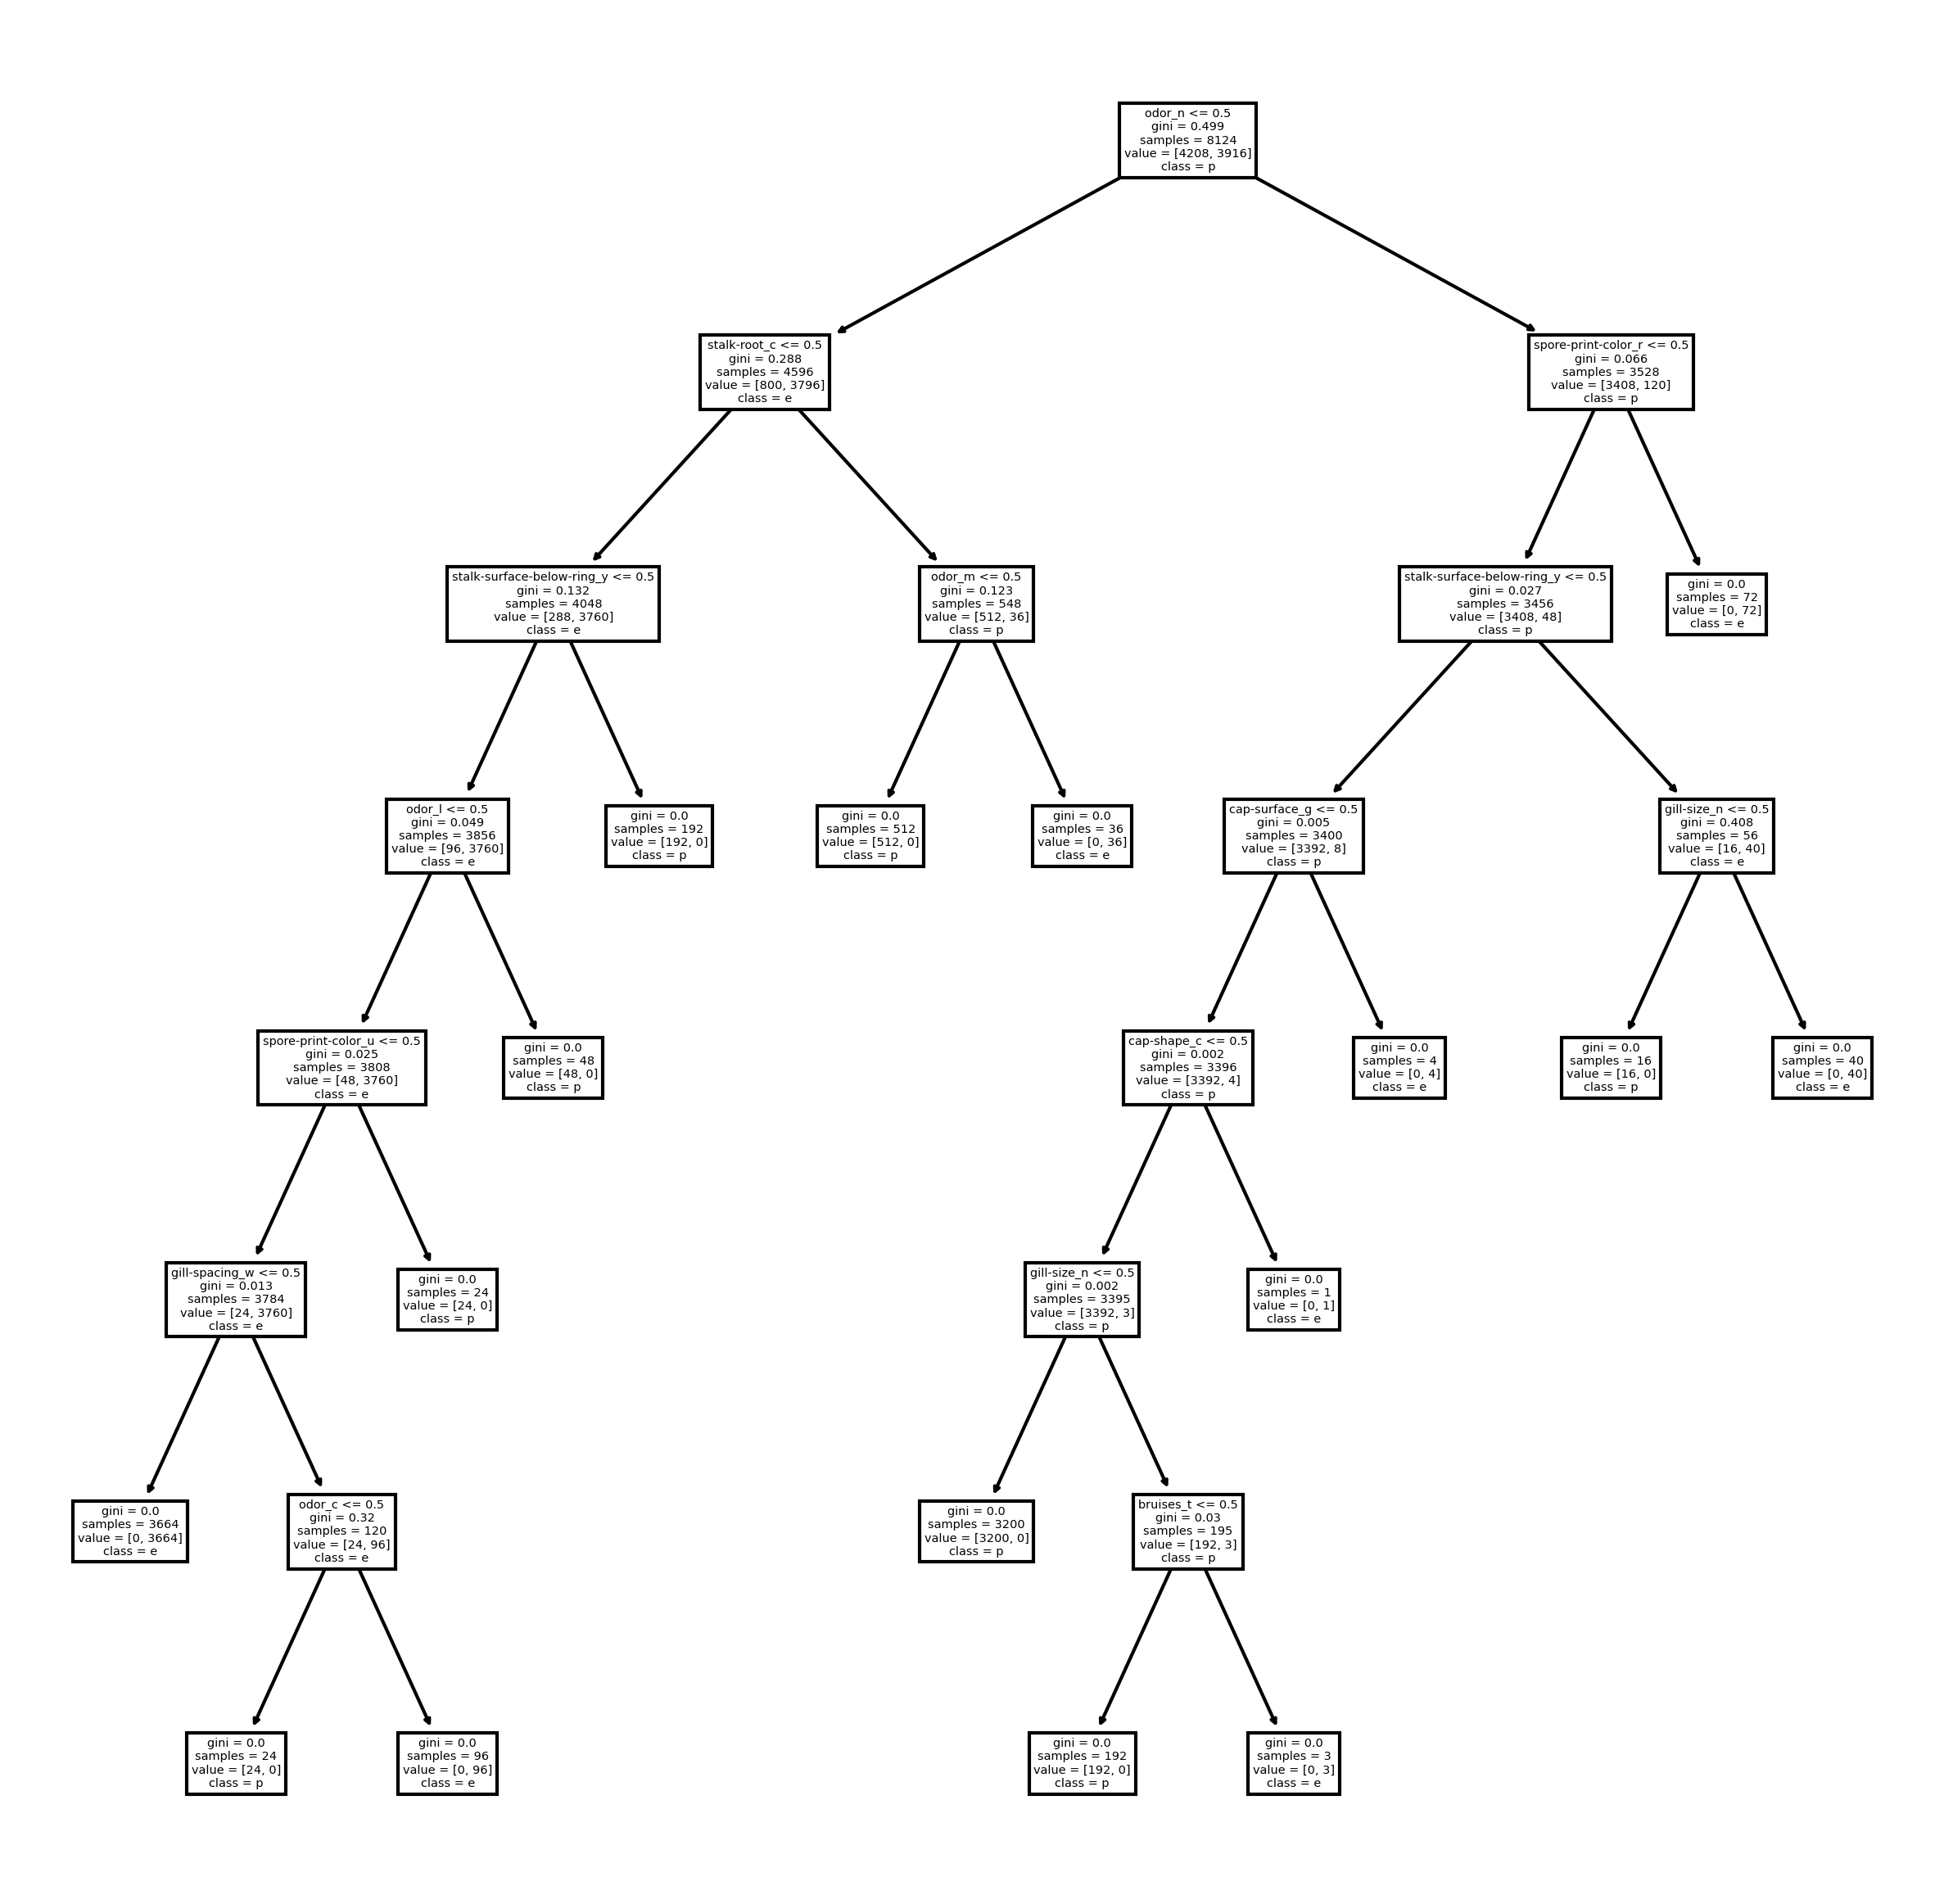

In [71]:
plt.figure(figsize=(10,10), dpi=300)
plot_tree(model, class_names=data['class'], feature_names=X.columns)
plt.show()